In [5]:
import pandas as pd
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from pysolar.solar import *
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_regression

In [6]:
# Importando o arquivo dat para o pandas e definindo seus tipos
df = pd.read_csv('table1modified.csv', index_col=0)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
df = df.rename(columns={'Angle': 'Altitude'})


display(df)

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,CMP21_Difuse_T_C_Max,Pyrh_Irrad_Avg,Pyrh_Irrad_Max,Pyrh_Irrad_Min,Pyrh_Irrad_Std,Pyrh_Temp_Avg,Pyrh_Temp_Max,DNI,Altitude,Azimuth
1,2016-05-16 04:31:00-03:00,643470,19.49,21.81,21.89,21.76,0.037,79.44,78.35,0.0,...,21.28,232.0,242.5,220.7,6.554,28.99,29.03,65.3,-31.114769,17.520008
2,2016-05-16 04:32:00-03:00,643471,19.57,21.72,21.76,21.62,0.033,78.35,77.71,0.0,...,21.33,203.9,220.7,191.0,9.770,29.08,29.15,58.1,-31.054673,17.786563
3,2016-05-16 04:33:00-03:00,643472,19.65,21.59,21.66,21.52,0.038,77.71,77.40,0.0,...,21.37,187.1,190.2,185.6,1.156,29.17,29.19,54.2,-30.993704,18.052678
4,2016-05-16 04:34:00-03:00,643473,19.73,21.48,21.55,21.42,0.032,77.95,77.44,0.0,...,21.46,198.6,205.8,187.1,5.413,29.24,29.28,58.2,-30.931862,18.318348
5,2016-05-16 04:35:00-03:00,643474,19.81,21.46,21.52,21.38,0.029,78.42,77.88,0.0,...,21.47,206.0,217.5,194.9,8.210,29.32,29.36,61.1,-30.869151,18.583567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305184,2017-04-19 05:02:00-03:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,26.58,106.4,116.9,100.6,4.199,32.83,32.87,55.7,-36.478808,28.349362
305185,2017-04-19 05:03:00-03:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,26.58,191.6,381.2,118.5,79.250,32.85,32.91,95.9,-36.384286,28.630573
305186,2017-04-19 05:04:00-03:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,26.58,361.6,415.5,302.4,39.420,32.92,33.00,174.5,-36.288913,28.910997
305187,2017-04-19 05:05:00-03:00,1130227,25.07,23.15,23.22,23.08,0.032,72.57,71.69,0.0,...,26.58,423.3,457.6,384.3,23.940,32.99,33.04,204.6,-36.192696,29.190631


In [7]:
df['TIMESTAMP'] = df['TIMESTAMP'].map(lambda a: datetime.datetime.fromisoformat(a).replace(tzinfo=datetime.timezone.utc))

In [8]:
df['TIMESTAMP'] = df['TIMESTAMP'].map(lambda a: a + datetime.timedelta(hours=3))
df.index = df['TIMESTAMP']
df.index = df.index.map(lambda a: a.strftime('%d-%m-%y %H:%M'))
display(df)

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,CMP21_Difuse_T_C_Max,Pyrh_Irrad_Avg,Pyrh_Irrad_Max,Pyrh_Irrad_Min,Pyrh_Irrad_Std,Pyrh_Temp_Avg,Pyrh_Temp_Max,DNI,Altitude,Azimuth
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
16-05-16 07:31,2016-05-16 07:31:00+00:00,643470,19.49,21.81,21.89,21.76,0.037,79.44,78.35,0.0,...,21.28,232.0,242.5,220.7,6.554,28.99,29.03,65.3,-31.114769,17.520008
16-05-16 07:32,2016-05-16 07:32:00+00:00,643471,19.57,21.72,21.76,21.62,0.033,78.35,77.71,0.0,...,21.33,203.9,220.7,191.0,9.770,29.08,29.15,58.1,-31.054673,17.786563
16-05-16 07:33,2016-05-16 07:33:00+00:00,643472,19.65,21.59,21.66,21.52,0.038,77.71,77.40,0.0,...,21.37,187.1,190.2,185.6,1.156,29.17,29.19,54.2,-30.993704,18.052678
16-05-16 07:34,2016-05-16 07:34:00+00:00,643473,19.73,21.48,21.55,21.42,0.032,77.95,77.44,0.0,...,21.46,198.6,205.8,187.1,5.413,29.24,29.28,58.2,-30.931862,18.318348
16-05-16 07:35,2016-05-16 07:35:00+00:00,643474,19.81,21.46,21.52,21.38,0.029,78.42,77.88,0.0,...,21.47,206.0,217.5,194.9,8.210,29.32,29.36,61.1,-30.869151,18.583567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19-04-17 08:02,2017-04-19 08:02:00+00:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,26.58,106.4,116.9,100.6,4.199,32.83,32.87,55.7,-36.478808,28.349362
19-04-17 08:03,2017-04-19 08:03:00+00:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,26.58,191.6,381.2,118.5,79.250,32.85,32.91,95.9,-36.384286,28.630573
19-04-17 08:04,2017-04-19 08:04:00+00:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,26.58,361.6,415.5,302.4,39.420,32.92,33.00,174.5,-36.288913,28.910997


In [5]:
# Visão geral das médias
sns.set_theme(style="white")
fig, axes = plt.subplots(7,1, sharex=True, figsize=(18,8))
fig.suptitle('Primeira 6 Horas')

# AirTC_Avg
sns.lineplot(ax=axes[0], x=df[0:360].index, y=df['AirTC_Avg'][0:360].values)
axes[0].set_title('AirTC_Avg')

# RH_Max
sns.lineplot(ax=axes[1], x=df[0:360].index, y=df['RH_Max'][0:360].values)
axes[1].set_title('RH_Max')

# Rain_mm_Tot
sns.lineplot(ax=axes[2], x=df[0:360].index, y=df['Rain_mm_Tot'][0:360].values)
axes[2].set_title('Rain_mm_Tot')

# WS_ms_Avg
sns.lineplot(ax=axes[3], x=df[0:360].index, y=df['WS_ms_Avg'][0:360].values)
axes[3].set_title('WS_ms_Avg')

# WindDir
sns.lineplot(ax=axes[4], x=df[0:360].index, y=df['WindDir'][0:360].values)
axes[4].set_title('WindDir')

# Slr_Irrad_Global_Avg
sns.lineplot(ax=axes[5], x=df[0:360].index, y=df['Slr_Irrad_Global_Avg'][0:360].values)
axes[5].set_title('Slr_Irrad_Global_Avg')

# Slr_Irrad_Difuse_Avg
sns.lineplot(ax=axes[6], x=df[0:360].index, y=df['Slr_Irrad_Difuse_Avg'][0:360].values)
axes[6].set_title('Slr_Irrad_Difuse_Avg')


NameError: name 'plt' is not defined

In [17]:
x = data.index[0:10080]
y = data['Temperatura Média (²C)'][0:10080]

ax = sns.lineplot(x,y )
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.show()

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'matplotlib' is not defined

Error in callback <function flush_figures at 0x00000181C689D3A0> (for post_execute):


KeyboardInterrupt: 

In [14]:
data.describe()

,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Pressão Barométrica (kPa),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),Irradiação Direta Média (W/m²),DNI Pireliômetro (W/m²),Chuva Acumulada em 1h (mm)
count,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,3.051290e+05
mean,23.317181,78.307749,0.002345,1.525990,171.394922,101.514227,197.856086,76.209736,121.646350,167.106168,1.406981e-01
std,3.929265,14.620356,0.030983,1.138673,111.177733,0.522624,300.598649,119.480424,240.181203,294.255684,9.298865e-01
min,11.630000,18.790000,0.000000,0.000000,0.000000,99.200000,0.000000,0.000000,-7.500000,0.000000,-1.243450e-14
25%,20.720000,69.080000,0.000000,0.612000,63.020000,101.200000,0.000000,0.000000,0.000000,0.000000,-4.440892e-15
50%,23.150000,81.400000,0.000000,1.292000,176.800000,101.500000,0.351000,0.000000,0.000000,0.000000,3.996803e-15
75%,25.680000,90.500000,0.000000,2.262000,270.600000,101.900000,323.400000,108.300000,78.560000,203.600000,3.996803e-15
max,37.560000,98.300000,2.540000,8.240000,354.600000,103.200000,1496.000000,877.000000,1018.800000,946.000000,2.438400e+01


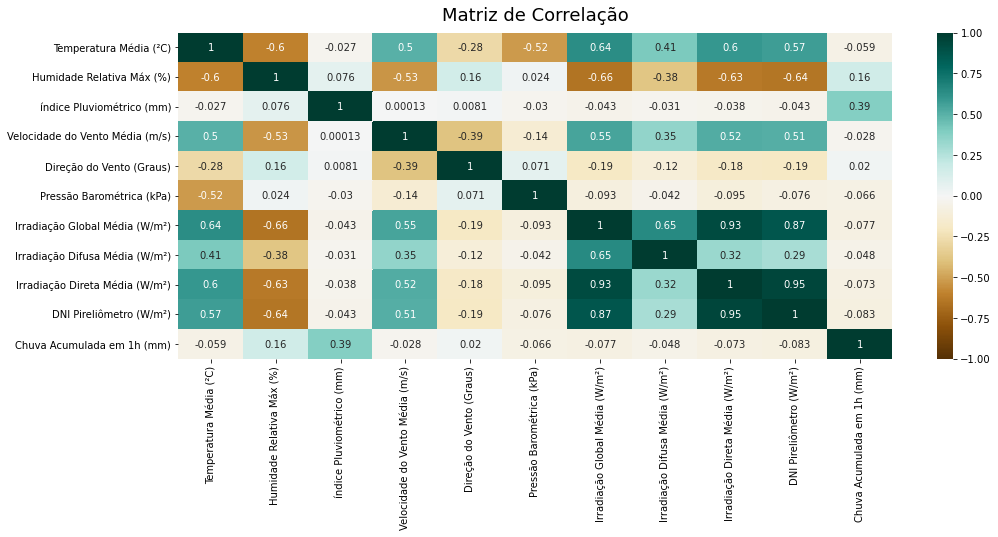

In [15]:
# Correlação
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matriz de Correlação', fontdict={'fontsize':18}, pad=12);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [293]:
# Separar Dataframes de diferentes meses
# maio_2016 = data[(data['Mês'] == 5) & (data['Ano'] == 2016)]
# junho_2016 = data[(data['Mês'] == 6) & (data['Ano'] == 2016)]
# julho_2016 = data[(data['Mês'] == 7) & (data['Ano'] == 2016)]
# agosto_2016 = data[(data['Mês'] == 8) & (data['Ano'] == 2016)]
# setembro_2016 = data[(data['Mês'] == 9) & (data['Ano'] == 2016)]
# outubro_2016 = data[(data['Mês'] == 10) & (data['Ano'] == 2016)]
# novembro_2016 = data[(data['Mês'] == 11) & (data['Ano'] == 2016)]
# dezembro_2016 = data[(data['Mês'] == 12) & (data['Ano'] == 2016)]
# janeiro_2017 = data[(data['Mês'] == 1) & (data['Ano'] == 2017)]
# fevereiro_2017 = data[(data['Mês'] == 2) & (data['Ano'] == 2017)]
# março_2017 = data[(data['Mês'] == 3) & (data['Ano'] == 2017)]
# abril_2017 = data[(data['Mês'] == 4) & (data['Ano'] == 2017)]

# Lista dos Dataframes
# dfs_meses = [maio_2016, junho_2016, julho_2016, agosto_2016, setembro_2016, outubro_2016, novembro_2016, dezembro_2016,
#             janeiro_2017, fevereiro_2017, março_2017, abril_2017]


In [294]:
variaveis = ['Temperatura Média (²C)', 'Humidade Relativa Máx (%)', 
             'índice Pluviométrico (mm)', 'Velocidade do Vento Média (m/s)',
             'Direção do Vento (Graus)', 'Irradiação Global Média (W/m²)', 'Irradiação Difusa Média (W/m²)',
             'Irradiação Direta Média (W/m²)', 'Ângulo Solar (Graus)',
            'Ângulo Azimutal (Graus)','Mês', 'Chuva Acumulada em 1h (mm)']


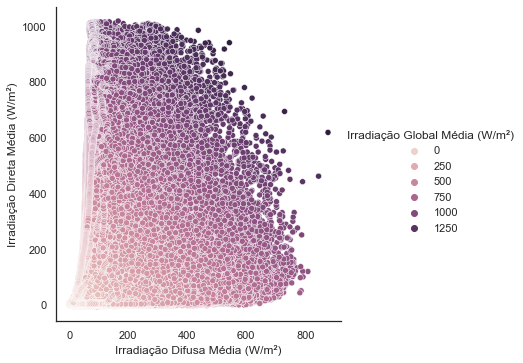

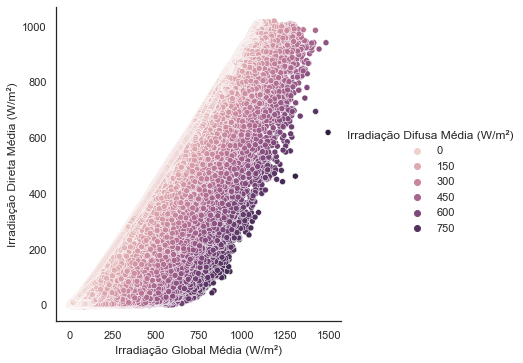

In [328]:
# Radiação Global e difusa
sns.relplot(x="Irradiação Difusa Média (W/m²)", y="Irradiação Direta Média (W/m²)", hue="Irradiação Global Média (W/m²)", data=data)
sns.relplot(x="Irradiação Global Média (W/m²)", y="Irradiação Direta Média (W/m²)",  hue="Irradiação Difusa Média (W/m²)", data=data)

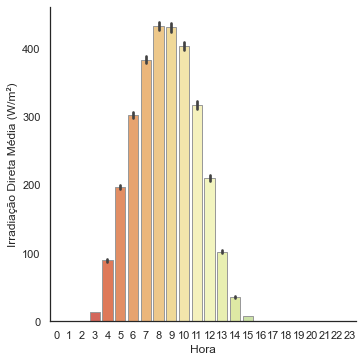

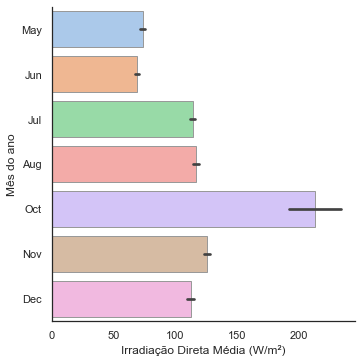

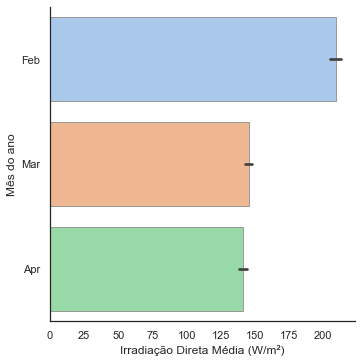

In [391]:
# Intervalos de Tempo
# Hora
sns.catplot(x="Hora", y="Irradiação Direta Média (W/m²)", kind="bar",
            palette="Spectral", edgecolor=".6",
            data=data)

# Meses do ano
sns.catplot(x="Irradiação Direta Média (W/m²)", y="Mês do ano", kind="bar",
            palette="pastel", edgecolor=".6",
            data=data[data['Ano'] == 2016])


sns.catplot(x="Irradiação Direta Média (W/m²)", y="Mês do ano", kind="bar",
            palette="pastel", edgecolor=".6",
            data=data[data['Ano'] == 2017])

# Dia do ano
#sns.relplot(
#    data=data[data['Ano'] == 2016],
#    x="Dia do Ano", y="Irradiação Direta Média (W/m²)",
#    hue = "Mês do ano"
#)
#sns.relplot(
#    data=data[data['Ano'] == 2017],
#    x="Dia do Ano", y="Irradiação Direta Média (W/m²)",
#)



# Verificar os dados dos meses e refazer os gráficos
# Refazer os ângulos

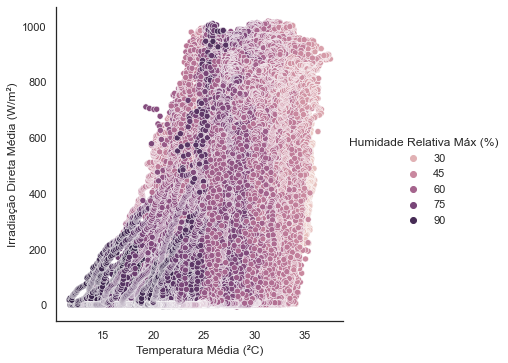

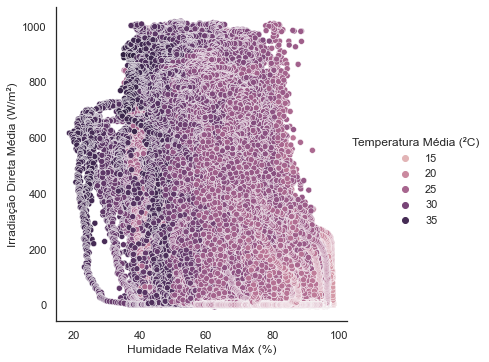

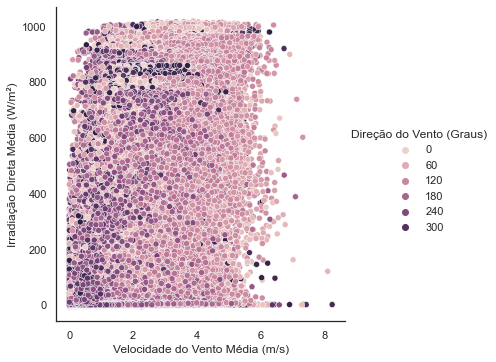

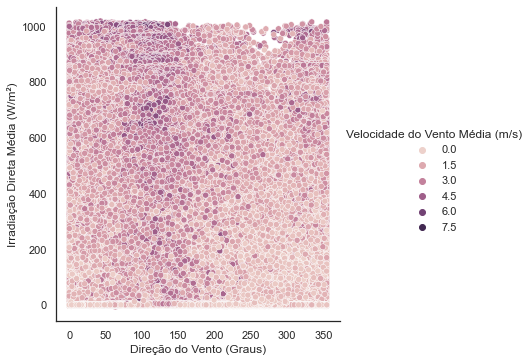

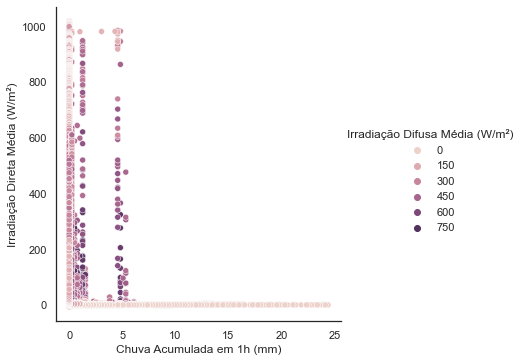

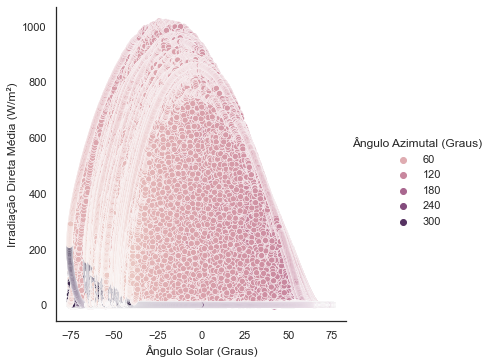

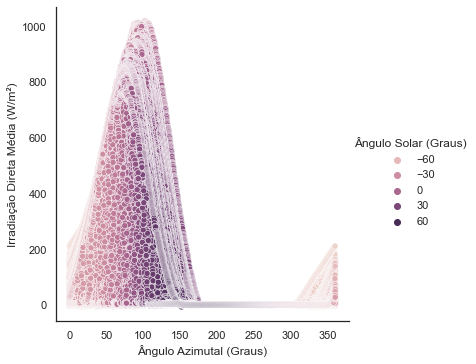

In [331]:
# Outras variáveis
sns.relplot(x="Temperatura Média (²C)", y="Irradiação Direta Média (W/m²)", hue="Humidade Relativa Máx (%)", data=data)
sns.relplot(x="Humidade Relativa Máx (%)", y="Irradiação Direta Média (W/m²)", hue="Temperatura Média (²C)", data=data)
sns.relplot(x="Velocidade do Vento Média (m/s)", y="Irradiação Direta Média (W/m²)", hue="Direção do Vento (Graus)", data=data)
sns.relplot(x="Direção do Vento (Graus)", y="Irradiação Direta Média (W/m²)", hue="Velocidade do Vento Média (m/s)", data=data)
sns.relplot(x="Chuva Acumulada em 1h (mm)", y="Irradiação Direta Média (W/m²)", hue="Irradiação Difusa Média (W/m²)", data=data)
sns.relplot(x="Ângulo Solar (Graus)", y="Irradiação Direta Média (W/m²)", hue="Ângulo Azimutal (Graus)", data=data)
sns.relplot(x="Ângulo Azimutal (Graus)", y="Irradiação Direta Média (W/m²)", hue="Ângulo Solar (Graus)", data=data)